In [2]:
! pip install fastcore --upgrade -qq
! pip install fastai --upgrade -qq

     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 186 kB 8.4 MB/s 


# Train a Model

In [3]:
from fastai.vision.all import *

source = untar_data(URLs.IMAGENETTE_320)
workers = min(8, num_cpus())

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_items=get_image_files, 
                   get_y=parent_label,
                   item_tfms=[RandomResizedCrop(192, min_scale=0.35), 
                              FlipItem(0.5)],
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

dls = dblock.dataloaders(source, bs=64, num_workers=workers)

learn = Learner(dls, xresnet50(n_out=dls.c), opt_func=ranger, 
                loss_func=LabelSmoothingCrossEntropyFlat(),
                metrics=accuracy)

learn.fit_flat_cos(5, 8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.718336,2.741811,0.369172,01:16
1,1.454372,1.360785,0.661911,01:15
2,1.276607,1.605025,0.590319,01:16
3,1.190464,1.160094,0.726369,01:17
4,1.041117,1.016868,0.793376,01:16


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


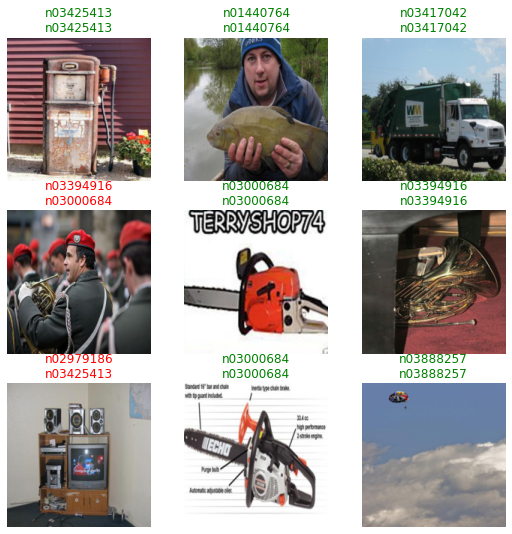

In [4]:
learn.show_results()

# Saving and Loading

## Export and load_learner

In [6]:
learn.export('xresnet50_export.pkl')

In [7]:
learn, dls = None, None

In [8]:
learn = load_learner('xresnet50_export.pkl', cpu=False)

## Save and Load

In [9]:
learn.save('xresnet50_save', with_opt=False)

Path('models/xresnet50_save.pth')

In [27]:
learn, dls = None, None

In [28]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_items=get_image_files, 
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(192),
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

dls = dblock.dataloaders(source, bs=64, num_workers=workers)

learn = Learner(dls, xresnet50(n_out=dls.c),
                loss_func=LabelSmoothingCrossEntropyFlat(),
                metrics=accuracy)

In [29]:
learn.load('xresnet50_save')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


# Inference

# Predict One Item

In [30]:
learn.predict(source/'val/n01440764/ILSVRC2012_val_00009111.JPEG')

('n01440764',
 tensor(0),
 tensor([0.8351, 0.0355, 0.0105, 0.0629, 0.0031, 0.0168, 0.0131, 0.0059, 0.0101,
         0.0072]))

# Batch Predictions 

In [16]:
test_files = [fn for fn in sorted((source/'val').glob('**/*')) if fn.is_file()]

In [17]:
test_dl = learn.dls.test_dl(test_files)
preds, _ = learn.get_preds(dl=test_dl)

In [18]:
preds[0]

tensor([0.8351, 0.0355, 0.0105, 0.0629, 0.0031, 0.0168, 0.0131, 0.0059, 0.0101,
        0.0072])

In [19]:
test_dl = learn.dls.test_dl(test_files)
preds, _, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [20]:
decoded[0]

tensor(0)

# Appendix

In [31]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=GrandparentSplitter(valid_name='val'),
                   get_items=get_image_files, 
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(192),
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

dls = dblock.dataloaders(source, bs=64, num_workers=workers)

learn = Learner(dls, xresnet50(n_out=dls.c),
                loss_func=nn.CrossEntropyLoss())

learn.load('xresnet50_save')

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [32]:
learn.predict(source/'val/n01440764/ILSVRC2012_val_00009111.JPEG')

("['n03000684', 'n01440764', 'n03888257', 'n01440764', 'n03445777', 'n01440764', 'n01440764', 'n03888257', 'n03888257', 'n03888257']",
 tensor([ 3.2740,  0.1149, -1.1062,  0.6877, -2.3351, -0.6300, -0.8832, -1.6813,
         -1.1409, -1.4827]),
 tensor([ 3.2740,  0.1149, -1.1062,  0.6877, -2.3351, -0.6300, -0.8832, -1.6813,
         -1.1409, -1.4827]))

In [23]:
test_dl = learn.dls.test_dl(test_files)
preds, _ = learn.get_preds(dl=test_dl)

In [24]:
preds[0]

tensor([ 3.2740,  0.1149, -1.1062,  0.6877, -2.3351, -0.6300, -0.8832, -1.6813,
        -1.1409, -1.4827])